# Cleaning and clustering car ads

The goal of this project is to analyze and clean a dataset of ads, which are related to the sale of used cars. I will de-duplicate the data, analyze and clean it, select only the relvant features and create some clusters in order to find interesting prices trends.

## Initialization


### Setting everythin up

In [2]:
# %pip install seaborn 
# %pip install matplotlib 
# %pip install plotly 
# %pip install pandas
# %pip install numpy
# %pip install dython 
# %pip install kmodes
# %pip install tqdm


In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import plotly.express as px
from datetime import datetime
from dython import nominal
from kmodes.kmodes import KModes
import tqdm


### Import data

In [4]:
pd.set_option("display.max_columns", None)  
# pd.reset_option("max_columns")

df = pd.read_csv("../Dataset/ads.csv")

/tmp/ipykernel_23404/2181185685.py:4: DtypeWarning: Columns (8,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Dataset/ads.csv")


## A first look at the data

In [5]:
df.head()


,Unnamed: 0,ecoClass,weight,location,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,gmapsAddress,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt
0,0,Euro 6d-TEMP,1385.0,NaN,Autohero Italia srl - Palermo,2021-09-07T14:25:58Z,NaN,b24,Grigio,4.0,6.0,Offerta n. TM25231\nhttps://www.autohero.com/i...,b24-6,5,"90146 Palermo - PA, Viale Strasburgo, 188, Italia",Berlina,88.0,Alfa Romeo Giulietta 1.6 JTDm 120 CV Super - C...,123.0,NaN,"4,7 l/100 km (comb.)\n4,1 l/100 km (urbano)\n5...",NaN,2019.0,16699,22305.0,1598.0,2021-08-31T10:55:00Z,OFFLINE,5.0,Diesel,Manuale,443127349f6368308a9a15635c226fe17780a77495a186...,b24-1611,2021-08-31 10:55:00+00:00
1,1,Euro 6d-TEMP,1385.0,NaN,Autohero Italia srl,2021-09-07T14:25:56Z,NaN,b24,Grigio,4.0,6.0,Offerta n. TM25231\nhttps://www.autohero.com/i...,b24-6,5,"00148 Roma, Via del Ponte Pisano, 98, Italia",Berlina,88.0,Alfa Romeo Giulietta 1.6 JTDm 120 CV Super - C...,123.0,NaN,"4,7 l/100 km (comb.)\n4,1 l/100 km (urbano)\n5...",NaN,2019.0,16699,22305.0,1598.0,2021-08-31T10:54:58Z,OFFLINE,5.0,Diesel,Manuale,ecb14705ee1425337546a3eb6f6b129a1e8288db1d56a1...,b24-1611,2021-08-31 10:54:58+00:00
2,2,Euro 6d,1475.0,"{'lat': 43.2895808, 'lon': 13.7342527}",NaN,2021-08-31T10:54:29Z,NaN,b24,Grigio,4.0,6.0,L'auto ha ancora 12 mesi di garanzia Alfa Rome...,b24-6,5,"63018 Porto Sant'Elpidio, Italia",Berlina,88.0,Alfa Romeo Giulietta Giulietta 1.6 jtdm Busine...,118.0,NaN,"4,5 l/100 km (comb.)\n5,1 l/100 km (urbano)\n4...",NaN,2019.0,13500,42000.0,1598.0,2021-08-31T10:54:29Z,OFFLINE,5.0,Diesel,Semiautomatico,2f38eecdb13480163c56fba13c2a417dfd8927a5121895...,b24-1611,2021-08-31 10:54:29+00:00
3,3,Euro 6,NaN,NaN,Gruppo Bossoni Spa,2021-08-31T10:54:19Z,NaN,b24,Grigio,4.0,6.0,"DEK:[5184052]\nCod. U639898\nPREZZO EFFETTIVO,...",b24-6,5,"25123 Brescia - Brescia - BS, Via Triumplina 9...",Berlina,88.0,Alfa Romeo Giulietta 1.6 jtdm Super 120cv tct,125.0,NaN,"4,7 l/100 km (comb.)\n5,1 l/100 km (urbano)\n4...",NaN,2019.0,15650,24818.0,1598.0,2021-08-31T10:54:19Z,OFFLINE,5.0,Diesel,Automatico,37d18003e981873650f5b2ba90767e3dfa6271fd47e7c8...,b24-1611,2021-08-31 10:54:19+00:00
4,4,Euro 6,1365.0,"{'lat': 45.89309129065672, 'lon': 13.499571852...",NaN,2021-09-07T14:24:57Z,NaN,b24,Bianco,4.0,6.0,Vendo alfa romeo giulietta 1.4 150cv super\nAl...,b24-6,5,"34072 gradisca d' isonzo, Italia",Berlina,110.0,Alfa Romeo Giulietta 1.4 Turbo MultiAir 150 CV...,127.0,NaN,"5,5 l/100 km (comb.)\n7,4 l/100 km (urbano)\n4...",NaN,2016.0,16500,61500.0,1368.0,2021-08-31T10:53:49Z,OFFLINE,5.0,Benzina,Manuale,b8e802e6ae9660b646727967f55fd761496e0b314d86f6...,b24-1611,2021-08-31 10:53:49+00:00


In [6]:
df.tail()


,Unnamed: 0,ecoClass,weight,location,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,gmapsAddress,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt
27786,30850,Pre-Euro,NaN,"{'lat': 45.65335, 'lon': 12.2960979}",LIVIO OLIVOTTO,2022-02-15T18:45:16Z,Azienda,a,NaN,NaN,NaN,Chilometraggio: 150000\nCondizioni: usato\nImm...,a-000083,"[2, 3]","Silea, Treviso",Utilitaria,59.0,ALFA ROMEO Giulietta Sprint Seconda Serie,NaN,id:ad:419631219:list:377138302,NaN,NaN,1960.0,38000,150000.0,NaN,2021-12-22T00:32:45Z,OFFLINE,4.0,Benzina,Manuale,bca3c66f9c2b6c3e77a55898094afab7d631d422d25873...,a-000313,2021-12-22 00:32:45+00:00
27787,30851,Euro 5,NaN,"{'lat': 40.8939029, 'lon': 9.4864775}",MotorGest | Roma - Sardegna,2022-02-15T18:45:29Z,Azienda,a,NaN,NaN,NaN,- VISIBILE SOLO SU APPUNTAMENTO -\n\nGuarda l'...,a-000083,"[4, 5]","Olbia, Sassari",Berlina,NaN,ALFA ROMEO Giulietta (2010) - 2015,NaN,id:ad:460380398:list:415457676,NaN,NaN,2015.0,11800,117000.0,NaN,2021-12-20T11:20:07Z,OFFLINE,5.0,Diesel,Manuale,9cae769070b2bb0c3a2ec16f6ccc0af8cb3f4d932a7eae...,a-000313,2021-12-20 11:20:07+00:00
27788,30852,Euro 5,NaN,"{'lat': 41.8933203, 'lon': 12.4829321}",S_P_ Policar 2009,2022-02-15T18:45:30Z,Azienda,a,NaN,NaN,NaN,clima autoradio cd alzacristalli elettrici com...,a-000083,"[4, 5]","Roma, Roma",Berlina,NaN,ALFA ROMEO Giulietta (2010) - 2012,NaN,id:ad:460377061:list:415454398,NaN,NaN,2012.0,7500,190000.0,NaN,2021-12-20T11:01:50Z,OFFLINE,5.0,Diesel,Manuale,b38ed6f049eb021dca2ded895430cefc660712db63e563...,a-000313,2021-12-20 11:01:50+00:00
27789,30853,Euro 5,NaN,"{'lat': 37.1016361, 'lon': 13.9376147}",generoso motors,2022-02-15T18:45:34Z,Azienda,a,NaN,NaN,NaN,"GENEROSO MOTORS, azienda leader nella compra-v...",a-000083,"[4, 5]","Licata, Agrigento",Berlina,77.0,Alfa Romeo Giulietta 1.6 JTDm-2 105 CV Progres...,NaN,id:ad:429917690:list:386763200,NaN,NaN,2011.0,8500,152000.0,1598.0,2021-12-19T19:00:08Z,OFFLINE,5.0,Diesel,Manuale,572bf1b1c3ae8271268483162da95d74fe744f571f0faf...,a-000313,2021-12-19 19:00:08+00:00
27790,30854,Euro 6,NaN,"{'lat': 46.2738173, 'lon': 10.940221602671102}",Daniel,2022-02-15T18:45:41Z,Privato,a,NaN,NaN,NaN,Vendo splendida alfa romeo giulietta quadrifog...,a-000083,"[4, 5]","Ville d'Anaunia, Trento",Berlina,NaN,Alfa giulietta quadrifoglio verde,NaN,id:ad:450983753:list:406642783,NaN,NaN,2014.0,16500,99000.0,NaN,2021-12-19T09:43:21Z,OFFLINE,5.0,Benzina,Automatico,079ff066f249754723d586cf398100ea3dd756d0937e24...,a-000313,2021-12-19 09:43:21+00:00


In [7]:
df.columns


Index(['Unnamed: 0', 'ecoClass', 'weight', 'location', 'seller', 'updatedAt',
       'sellerType', 'source', 'color', 'cylinders', 'gears', 'description',
       'makeId', 'doors', 'gmapsAddress', 'bodyType', 'kw', 'title',
       'co2Emissions', 'urn', 'consumption', 'forNoviceDrivers', 'year',
       'price', 'km', 'engineSize', 'createdAt', 'status', 'seats', 'supply',
       'gearType', 'doc_id', 'modelId', 'created_dt'],
      dtype='object')

In [8]:
print("N rows:", len(df))


N rows: 27791


In [9]:
print("N columns:", len(df.columns))


N columns: 34


Our columns
 
 * 0   Unnamed: 0        27791 non-null  int64  --> similar to an index
 * 1   ecoClass          20175 non-null  object  --> class of the vehicle
 * 2   weight            6319 non-null   float64 --> weight
 * 3   location          22583 non-null  object --> lat and long gmpasAddress
 * 4   seller            24705 non-null  object --> seller of the vehicle
 * 5   updatedAt         27791 non-null  object --> when was ad updated last
 * 6   sellerType        19607 non-null  object --> category of seller
 * 7   source            27791 non-null  object --> where was ad scraped from
 * 8   color             8011 non-null   object --> color
 * 9   cylinders         7294 non-null   float64 --> number of cylinders
 * 10  gears             7470 non-null   float64 --> number of gears
 * 11  description       27087 non-null  object --> description of ad
 * 12  makeId            27791 non-null  object --> similar to source
 * 13  doors             23270 non-null  object --> n doors
 * 14  gmapsAddress      27791 non-null  object --> address of the vehicle 
 * 15  bodyType          23580 non-null  object  --> type of vehicle 
 * 16  kw                14615 non-null  float64 --> power
 * 17  title             27791 non-null  object  --> title of ad
 * 18  co2Emissions      6992 non-null   float64 --> emissions of co2 of vehicle
 * 19  urn               1705 non-null   object --> very few values
 * 20  consumption       7225 non-null   object --> consumption
 * 21  forNoviceDrivers  2 non-null      object --> can novice drivers use the car?
 * 22  year              27741 non-null  float64 --> registration year 
 * 23  price             27791 non-null  int64  --> vehicles price
 * 24  km                27718 non-null  float64 --> km of sold car
 * 25  engineSize        8969 non-null   float64 --> size of the engine
 * 26  createdAt         27791 non-null  object --> when was the ad created
 * 27  status            27791 non-null  object --> online/offline
 * 28  seats             22225 non-null  float64 --> number of seats
 * 29  supply            25781 non-null  object --> type of fuel
 * 30  gearType          25886 non-null  object --> type of gearbox
 * 31  doc_id            27791 non-null  object --> only unique values
 * 32  modelId           27791 non-null  object --> similar to source
 * 33  created_dt        27791 non-null  object --> datetime creation ad

In [10]:
df.describe()


,Unnamed: 0,weight,cylinders,gears,kw,co2Emissions,year,price,km,engineSize,seats
count,27791.000000,6319.000000,7294.000000,7470.000000,14615.000000,6992.000000,27741.000000,27791.000000,2.771800e+04,8969.000000,22225.000000
mean,15730.045087,1377.389302,3.998766,5.988755,94.128166,120.928490,2013.424462,10826.466842,1.221084e+05,1604.578771,4.992756
std,8813.079236,37.443638,0.192050,0.168894,28.676456,18.030364,6.535315,4252.532376,8.720268e+05,215.784927,0.116539
min,0.000000,900.000000,0.000000,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000e+00,1.000000,2.000000
25%,8247.500000,1365.000000,4.000000,6.000000,88.000000,104.000000,2012.000000,7500.000000,7.000000e+04,1400.000000,5.000000
50%,15868.000000,1385.000000,4.000000,6.000000,88.000000,119.000000,2014.000000,9800.000000,1.117500e+05,1598.000000,5.000000
75%,23254.500000,1395.000000,4.000000,6.000000,102.970000,133.000000,2017.000000,13500.000000,1.520000e+05,1598.000000,5.000000
max,30854.000000,3095.000000,16.000000,7.000000,1600.000000,179.000000,2022.000000,39900.000000,1.000000e+08,2200.000000,6.000000


## Duplicates

### How to identify a duplicate?
There is no such thing as an "Ad entity ID", so we will have to use some columns as key.
* Duplicates from different sources
* Duplicates in different cities
* Duplicatas because the ad was re-published
Subest of keys: price, year, km.
<br><br>
What about the title? I found duplicates with different titles, as well as different ads with the same title. It is a trade-off, we can use the title as key, accepting that we will "save" some duplicates.

### Preparation

#### Location

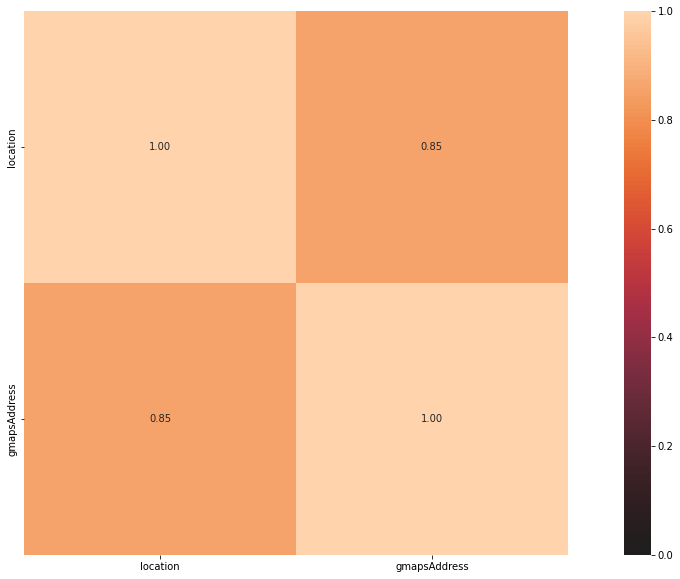

{'corr':               location  gmapsAddress
 location       1.00000       0.85453
 gmapsAddress   0.85453       1.00000,
 'ax': <AxesSubplot:>}

In [11]:
df_step = df[["location", "gmapsAddress"]]
nominal.associations(df_step, figsize=(20, 10))

In [12]:
df["gmapsAddress"].value_counts(dropna=False)


Roma, Roma                                               799
Torino, Torino                                           609
Palermo, Palermo                                         358
Milano, Milano                                           280
Catania, Catania                                         276
                                                        ... 
63900 Fermo, Italia                                        1
33030 Majano - Udine - Ud, Via S. Martino, 13, Italia      1
73100 Maglie, Italia                                       1
20017 Rho - Mi, Via Marconi,7, Italia                      1
Torreglia, Padova                                          1
Name: gmapsAddress, Length: 5861, dtype: int64

In [13]:
def clean_location(df: pd.DataFrame):
    df_cities = pd.read_csv("../Dataset/comuni_italiani.csv", delimiter=",")
    df_cities["lunghezzaComune"] = df_cities["comune"].apply(lambda x: len(x))
    df_cities.sort_values("lunghezzaComune", ascending=False, inplace=True)
    cities = df_cities["comune"].tolist()
    d = dict()
    keys = df["gmapsAddress"].unique()
    for key in tqdm.tqdm(keys, desc="Getting cities"):
        for city in cities:
            if str(city).lower() in str(key).lower():
                value = str(city).lower()
                d[key] = value
                break
    df_small = pd.DataFrame.from_dict(
        d, orient="index", columns=["citta"]
    ).reset_index()
    df_small.rename(columns={"index": "gmapsAddress"}, inplace=True)
    df = df.merge(df_small, how="left", on="gmapsAddress")
    df.drop(["location", "gmapsAddress"], axis=1, inplace=True)
    df["citta"] = df["citta"].fillna("")
    return df

df = clean_location(df)

Getting cities: 100%|██████████| 5861/5861 [00:04<00:00, 1294.72it/s]


In [14]:
df["citta"].value_counts(dropna=False)


torino                1043
roma                   799
alia                   708
milano                 603
catania                475
                      ... 
carmiano                 1
monticello brianza       1
siderno                  1
pozzuolo martesana       1
torreglia                1
Name: citta, Length: 2248, dtype: int64

In [15]:
df["citta"].mode()


0    torino
Name: citta, dtype: object

In [16]:
# fillna with mode
df.loc[df["citta"].isnull(), "citta"] = "torino"


#### Date

In [17]:
df[["updatedAt", "createdAt", "created_dt"]]


,updatedAt,createdAt,created_dt
0,2021-09-07T14:25:58Z,2021-08-31T10:55:00Z,2021-08-31 10:55:00+00:00
1,2021-09-07T14:25:56Z,2021-08-31T10:54:58Z,2021-08-31 10:54:58+00:00
2,2021-08-31T10:54:29Z,2021-08-31T10:54:29Z,2021-08-31 10:54:29+00:00
3,2021-08-31T10:54:19Z,2021-08-31T10:54:19Z,2021-08-31 10:54:19+00:00
4,2021-09-07T14:24:57Z,2021-08-31T10:53:49Z,2021-08-31 10:53:49+00:00
...,...,...,...
27786,2022-02-15T18:45:16Z,2021-12-22T00:32:45Z,2021-12-22 00:32:45+00:00
27787,2022-02-15T18:45:29Z,2021-12-20T11:20:07Z,2021-12-20 11:20:07+00:00
27788,2022-02-15T18:45:30Z,2021-12-20T11:01:50Z,2021-12-20 11:01:50+00:00
27789,2022-02-15T18:45:34Z,2021-12-19T19:00:08Z,2021-12-19 19:00:08+00:00


In [18]:
pd.to_datetime(df["createdAt"].str[0:10], format="%Y-%m-%d")

0       2021-08-31
1       2021-08-31
2       2021-08-31
3       2021-08-31
4       2021-08-31
           ...    
27786   2021-12-22
27787   2021-12-20
27788   2021-12-20
27789   2021-12-19
27790   2021-12-19
Name: createdAt, Length: 27791, dtype: datetime64[ns]

In [19]:
# Let's get a decent format
df["dataCreazione"] = pd.to_datetime(df["createdAt"].str[0:10], format="%Y-%m-%d")
df["dataUpdate"] = pd.to_datetime(df["updatedAt"].str[0:10], format="%Y-%m-%d")
df[["updatedAt", "createdAt", "created_dt", "dataCreazione", "dataUpdate"]]


,updatedAt,createdAt,created_dt,dataCreazione,dataUpdate
0,2021-09-07T14:25:58Z,2021-08-31T10:55:00Z,2021-08-31 10:55:00+00:00,2021-08-31,2021-09-07
1,2021-09-07T14:25:56Z,2021-08-31T10:54:58Z,2021-08-31 10:54:58+00:00,2021-08-31,2021-09-07
2,2021-08-31T10:54:29Z,2021-08-31T10:54:29Z,2021-08-31 10:54:29+00:00,2021-08-31,2021-08-31
3,2021-08-31T10:54:19Z,2021-08-31T10:54:19Z,2021-08-31 10:54:19+00:00,2021-08-31,2021-08-31
4,2021-09-07T14:24:57Z,2021-08-31T10:53:49Z,2021-08-31 10:53:49+00:00,2021-08-31,2021-09-07
...,...,...,...,...,...
27786,2022-02-15T18:45:16Z,2021-12-22T00:32:45Z,2021-12-22 00:32:45+00:00,2021-12-22,2022-02-15
27787,2022-02-15T18:45:29Z,2021-12-20T11:20:07Z,2021-12-20 11:20:07+00:00,2021-12-20,2022-02-15
27788,2022-02-15T18:45:30Z,2021-12-20T11:01:50Z,2021-12-20 11:01:50+00:00,2021-12-20,2022-02-15
27789,2022-02-15T18:45:34Z,2021-12-19T19:00:08Z,2021-12-19 19:00:08+00:00,2021-12-19,2022-02-15


### Check point

In [20]:
os.makedirs("../Dataframes", exist_ok=True)
df.to_csv("../Dataframes/df_data_citta.csv", index=False)


In [21]:
# df = pd.read_csv("../Dataframes/df_data_citta.csv")


### Duplicates: source

In [22]:
to_group = ["km", "price", "year", "title", "dataCreazione", "citta"]
df_agg = df.groupby(to_group)


In [23]:
df["idDupli"] = df.index.copy()
dupliId = np.max(df["idDupli"]) + 1

for name, single_group in df_agg:
    if single_group["source"].nunique() > 1:
        df.loc[single_group.index, "idDupli"] = dupliId
        dupliId += 1

# Rows with same dupliId are duplicates!
df.sort_values("idDupli", ascending=False).head()


,Unnamed: 0,ecoClass,weight,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt,citta,dataCreazione,dataUpdate,idDupli
14525,16503,Euro 5,NaN,TM WAGEN OUTLET,2022-01-28T17:38:55Z,Azienda,a,NaN,NaN,NaN,Alfa Romeo Giulietta 1.4 t. Progression Gpl 12...,a-000083,"[4, 5]",Berlina,88.000,Alfa Romeo Giulietta 1.4 t. Progression Gpl 120cv,NaN,id:ad:465636073:list:420530170,NaN,NaN,2012.0,4990,269000.0,1368.0,2022-01-27T18:51:22Z,OFFLINE,5.0,NaN,Manuale,257fded1f50cb390b5380b1f361fa598ca0be8b962f93a...,a-000313,2022-01-27 18:51:22+00:00,pistoia,2022-01-27,2022-01-28,27819
2697,3082,Euro 5,1317.0,TM Wagen Outlet,2022-01-27T10:43:48Z,NaN,b24,Grigio,4.0,6.0,Alfa Romeo Giulietta 1.4 t. Progression Gpl 12...,b24-6,5,Berlina,88.000,Alfa Romeo Giulietta 1.4 t. Progression Gpl 120cv,134.0,NaN,"8,3 l/100 km (comb.)\n10,9 l/100 km (urbano)\n...",NaN,2012.0,4990,269000.0,1368.0,2022-01-27T10:43:48Z,OFFLINE,5.0,GPL,Manuale,ff1e5e17bbebb270d6589cf1bf046b2994a5796b249c4d...,b24-1611,2022-01-27 10:43:48+00:00,pistoia,2022-01-27,2022-01-27,27819
15096,17211,Euro 5,NaN,Classy Car di Vinciguerra Paolo,2021-06-20T08:53:04Z,Azienda,a,NaN,NaN,NaN,"\n\nALFA ROMEO GIULIETTA ""QV"" 1750CC 235 CV \n...",a-000083,"[4, 5]",Berlina,172.000,Alfa Romeo Giulietta 1750 tbi Q.verde 235cv,NaN,NaN,NaN,NaN,2013.0,12990,132396.0,NaN,2021-06-18T07:56:52Z,OFFLINE,5.0,Benzina,Manuale,5990fad1cc30f348bd024e1fe08134469a6618c0fa86e8...,a-000313,2021-06-18 07:56:52+00:00,torino,2021-06-18,2021-06-20,27818
2253,2621,Euro 5,NaN,Classy Car di Vinciguerra Paolo,2021-06-18T06:19:52Z,NaN,b24,Nero,4.0,6.0,"ALFA ROMEO GIULIETTA ""QV"" 1750CC 235 CV\nAUTOV...",b24-6,5,Berlina,173.000,Alfa Romeo Giulietta 1750 tbi Q.verde 235cv,177.0,NaN,"7,6 l/100 km (comb.)\n10,8 l/100 km (urbano)\n...",NaN,2013.0,12990,132396.0,1742.0,2021-06-18T06:19:52Z,OFFLINE,5.0,Benzina,Manuale,9dfb57c991822accb4732e495fb58dd050a96ca92812c1...,b24-1611,2021-06-18 06:19:52+00:00,torino,2021-06-18,2021-06-18,27818
26820,29721,Euro 6,NaN,auto mgv srl,2021-07-11T17:38:34Z,Azienda,a,NaN,NaN,NaN,"Alfa Romeo Giulietta 2.0 JTDm 150 CV Business,...",a-000083,"[4, 5]",Berlina,110.325,Alfa Romeo Giulietta 2.0 JTDm 150 CV Business,NaN,NaN,NaN,NaN,2018.0,11900,129000.0,NaN,2021-07-11T08:36:19Z,OFFLINE,5.0,Diesel,Manuale,03f1607d3386c63772fe73712d23db69670c8de7ad5762...,a-000313,2021-07-11 08:36:19+00:00,la loggia,2021-07-11,2021-07-11,27817


In [24]:
# Droppo i duplicati, tenendo come regola la riga con dataUpdate più recente
df = df.sort_values("dataUpdate", ascending=False).drop_duplicates(
    "idDupli", keep="first"
)
df.sort_values("idDupli", ascending=False).head()


,Unnamed: 0,ecoClass,weight,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt,citta,dataCreazione,dataUpdate,idDupli
14525,16503,Euro 5,NaN,TM WAGEN OUTLET,2022-01-28T17:38:55Z,Azienda,a,NaN,NaN,NaN,Alfa Romeo Giulietta 1.4 t. Progression Gpl 12...,a-000083,"[4, 5]",Berlina,88.0,Alfa Romeo Giulietta 1.4 t. Progression Gpl 120cv,NaN,id:ad:465636073:list:420530170,NaN,NaN,2012.0,4990,269000.0,1368.0,2022-01-27T18:51:22Z,OFFLINE,5.0,NaN,Manuale,257fded1f50cb390b5380b1f361fa598ca0be8b962f93a...,a-000313,2022-01-27 18:51:22+00:00,pistoia,2022-01-27,2022-01-28,27819
15096,17211,Euro 5,NaN,Classy Car di Vinciguerra Paolo,2021-06-20T08:53:04Z,Azienda,a,NaN,NaN,NaN,"\n\nALFA ROMEO GIULIETTA ""QV"" 1750CC 235 CV \n...",a-000083,"[4, 5]",Berlina,172.0,Alfa Romeo Giulietta 1750 tbi Q.verde 235cv,NaN,NaN,NaN,NaN,2013.0,12990,132396.0,NaN,2021-06-18T07:56:52Z,OFFLINE,5.0,Benzina,Manuale,5990fad1cc30f348bd024e1fe08134469a6618c0fa86e8...,a-000313,2021-06-18 07:56:52+00:00,torino,2021-06-18,2021-06-20,27818
7540,9032,Euro 6,1395.0,Auto MGV Srl,2021-07-27T08:06:39Z,NaN,b24,Blu/Azzurro,4.0,6.0,"Alfa Romeo Giulietta 2.0 JTDm 150 CV Business,...",b24-6,5,Berlina,110.0,Alfa Romeo Giulietta 2.0 JTDm 150 CV Business,110.0,NaN,"4,2 l/100 km (comb.)\n5 l/100 km (urbano)\n3,7...",NaN,2018.0,11900,129000.0,1956.0,2021-07-11T06:46:10Z,OFFLINE,5.0,Diesel,Manuale,18d157fc1ba17769fb6f37673f615b7d6d4a3487f352ee...,b24-1611,2021-07-11 06:46:10+00:00,la loggia,2021-07-11,2021-07-27,27817
11233,13056,Euro 6,NaN,Antonietti Leonello srl,2021-10-19T00:10:04Z,Azienda,a,NaN,NaN,NaN,"Garanzia 12 MESI. Controllata, sanificata e ga...",a-000083,"[4, 5]",Berlina,88.0,Alfa Romeo Giulietta 1.4 Turbo 120 CV GPL Sprint,NaN,NaN,NaN,NaN,2015.0,12500,118000.0,1368.0,2021-10-18T12:39:15Z,OFFLINE,5.0,NaN,Manuale,4789b755a0d32a2d58778db39ad0b6c7e46ac9a2898807...,a-000313,2021-10-18 12:39:15+00:00,fabriano,2021-10-18,2021-10-19,27816
18744,21017,Euro 5,NaN,LOCAUTO DUE,2022-01-25T11:01:07Z,Azienda,a,NaN,NaN,NaN,Scegli la tua nuova auto con un Click!\nTi ver...,a-000083,"[4, 5]",Berlina,NaN,Alfa Romeo Giulietta 1.6 JTDm-2 105 CV Distinc...,NaN,NaN,NaN,NaN,2016.0,10490,116456.0,1598.0,2022-01-18T16:01:36Z,OFFLINE,5.0,Diesel,Manuale,7591c9b3b9b959a1004902228212bb2bd38a02de49f019...,a-000313,2022-01-18 16:01:36+00:00,roletto,2022-01-18,2022-01-25,27815


### Duplicates: city

In [25]:
to_group = ["km", "price", "year", "title", "dataCreazione", "source"]
df_agg = df.groupby(to_group)


In [26]:
df["idDupli"] = df.index.copy()
dupliId = np.max(df["idDupli"]) + 1

for name, single_group in df_agg:
    if single_group["citta"].nunique() > 1:
        df.loc[single_group.index, "idDupli"] = dupliId
        dupliId += 1

df.sort_values("idDupli", ascending=False).head()


,Unnamed: 0,ecoClass,weight,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt,citta,dataCreazione,dataUpdate,idDupli
14654,16749,Euro 5,NaN,Auto Casertano Group,2022-02-10T09:01:54Z,Azienda,a,NaN,NaN,NaN,Auto in perfetto stato di usura \n\n 12 mesi d...,a-000083,"[4, 5]",Berlina,77.0,Alfa Romeo Giulietta 1.6 JTDm-2 105 CV Exclusi...,NaN,id:ad:465242610:list:420048591,NaN,NaN,2012.0,7500,212612.0,1598.0,2022-01-25T16:16:31Z,OFFLINE,5.0,Diesel,Manuale,098d51cc2b861f8b1df4feb2379aac11229a65a55335c9...,a-000313,2022-01-25 16:16:31+00:00,capodrise,2022-01-25,2022-02-10,28101
25567,28433,Euro 5,NaN,Auto Casertano Group,2022-02-15T18:36:01Z,Azienda,a,NaN,NaN,NaN,Auto in perfetto stato di usura \n\n 12 mesi d...,a-000083,"[4, 5]",Berlina,77.0,Alfa Romeo Giulietta 1.6 JTDm-2 105 CV Exclusi...,NaN,id:ad:465242610:list:420048591,NaN,NaN,2012.0,7500,212612.0,1598.0,2022-01-25T16:16:31Z,ONLINE,5.0,Diesel,Manuale,6334c8fe422ac20091176a71324d7beb3a19fc9c8c3d94...,a-000313,2022-01-25 16:16:31+00:00,casapulla,2022-01-25,2022-02-15,28101
13788,15761,Euro 5,NaN,Ariel Srl,2021-08-03T21:26:45Z,Azienda,a,NaN,NaN,NaN,"Per maggiori informazioni, accessori e foto su...",a-000083,"[4, 5]",Berlina,77.0,ALFA ROMEO GIULIETTA 1.6 jtdm Distinctive,NaN,NaN,NaN,NaN,2010.0,4500,191744.0,1598.0,2021-08-03T14:22:36Z,OFFLINE,5.0,Diesel,Manuale,62aab6ef7011de67cd4f04c764bc6e6d275e1a37b44d14...,a-000313,2021-08-03 14:22:36+00:00,casei gerola,2021-08-03,2021-08-03,28100
23536,26275,Euro 5,NaN,Ariel Car Firenze,2021-08-03T21:26:43Z,Azienda,a,NaN,NaN,NaN,"Per maggiori informazioni, accessori e foto su...",a-000083,"[4, 5]",Berlina,77.0,ALFA ROMEO GIULIETTA 1.6 jtdm Distinctive,NaN,NaN,NaN,NaN,2010.0,4500,191744.0,1598.0,2021-08-03T14:22:58Z,OFFLINE,5.0,Diesel,Manuale,a49d49eccdfea0e2d0453f209c80d08c218d8102469226...,a-000313,2021-08-03 14:22:58+00:00,firenze,2021-08-03,2021-08-03,28100
21445,24014,Euro 5,NaN,Ariel Car Roma,2021-08-03T21:26:44Z,Azienda,a,NaN,NaN,NaN,"Per maggiori informazioni, accessori e foto su...",a-000083,"[4, 5]",Berlina,77.0,ALFA ROMEO GIULIETTA 1.6 jtdm Distinctive,NaN,NaN,NaN,NaN,2010.0,4500,191744.0,1598.0,2021-08-03T14:22:39Z,OFFLINE,5.0,Diesel,Manuale,77c71a99bc21131705611a0a687338b8f9b1cbd0283dcc...,a-000313,2021-08-03 14:22:39+00:00,roma,2021-08-03,2021-08-03,28100


In [27]:
df = df.sort_values("dataUpdate", ascending=False).drop_duplicates(
    "idDupli", keep="first"
)
df.sort_values("idDupli", ascending=False).head()


,Unnamed: 0,ecoClass,weight,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt,citta,dataCreazione,dataUpdate,idDupli
25567,28433,Euro 5,NaN,Auto Casertano Group,2022-02-15T18:36:01Z,Azienda,a,NaN,NaN,NaN,Auto in perfetto stato di usura \n\n 12 mesi d...,a-000083,"[4, 5]",Berlina,77.0,Alfa Romeo Giulietta 1.6 JTDm-2 105 CV Exclusi...,NaN,id:ad:465242610:list:420048591,NaN,NaN,2012.0,7500,212612.0,1598.0,2022-01-25T16:16:31Z,ONLINE,5.0,Diesel,Manuale,6334c8fe422ac20091176a71324d7beb3a19fc9c8c3d94...,a-000313,2022-01-25 16:16:31+00:00,casapulla,2022-01-25,2022-02-15,28101
9083,10768,Euro 5,NaN,ARIEL BARI S.R.L.,2021-08-03T21:26:43Z,Azienda,a,NaN,NaN,NaN,"Per maggiori informazioni, accessori e foto su...",a-000083,"[4, 5]",Berlina,77.0,ALFA ROMEO GIULIETTA 1.6 jtdm Distinctive,NaN,NaN,NaN,NaN,2010.0,4500,191744.0,1598.0,2021-08-03T14:22:57Z,OFFLINE,5.0,Diesel,Manuale,c167eec311671c7c999fcefc6f8c2b2a909ee364721d18...,a-000313,2021-08-03 14:22:57+00:00,bari,2021-08-03,2021-08-03,28100
25899,28793,Euro 5,NaN,passione automobili srl,2021-08-18T01:42:38Z,Azienda,a,NaN,NaN,NaN,CONTATTI: TEL. UFFICIO 0 CELL. \n\nALFA ROMEO ...,a-000083,"[4, 5]",Altro,NaN,ALFA ROMEO Giulietta - 2013,NaN,NaN,NaN,NaN,2013.0,7990,190000.0,NaN,2021-08-06T11:44:22Z,OFFLINE,5.0,Diesel,Manuale,6fd5f793854a3ebc54a32ba3cb19a2cbe5e5a84bdf38fd...,a-000313,2021-08-06 11:44:22+00:00,caravaggio,2021-08-06,2021-08-18,28099
1972,2339,Euro 6d-TEMP,1385.0,International G.c. Motors Cepagatti,2021-08-31T10:48:05Z,NaN,b24,Argento,4.0,6.0,N.B: La dotazione tecnica e gli accessori indi...,b24-6,5,Berlina,88.0,Alfa Romeo Giulietta 1.6 JTDm 120 CV Super,123.0,NaN,"4,7 l/100 km (comb.)\n5,7 l/100 km (urbano)\n4...",NaN,2016.0,10000,181550.0,1598.0,2021-07-11T06:41:20Z,OFFLINE,5.0,Diesel,Manuale,b984533495b26687f7727e6e8c9d37200fdea5ad7c2362...,b24-1611,2021-07-11 06:41:20+00:00,cepagatti,2021-07-11,2021-08-31,28098
20375,22783,Euro 5,NaN,Car Center Srl,2021-11-30T18:08:04Z,Azienda,a,NaN,NaN,NaN,Promo Black Friday : Passaggio incluso nel pre...,a-000083,"[4, 5]",Berlina,NaN,Alfa romeo giulietta-passaggio incluso nel prezzo,NaN,NaN,NaN,NaN,2012.0,8900,179000.0,NaN,2021-11-22T10:59:03Z,OFFLINE,5.0,Diesel,Manuale,536de9d0c807cf1e43d39e1c29106afcacf40dbf4d6e76...,a-000313,2021-11-22 10:59:03+00:00,avezzano,2021-11-22,2021-11-30,28097


### Duplicates: creation date

In [28]:
to_group = ["km", "price", "year", "title", "citta", "source"]
df_agg = df.groupby(to_group)


In [29]:
df["idDupli"] = df.index.copy()
dupliId = np.max(df["idDupli"]) + 1

for name, single_group in df_agg:
    if single_group["dataCreazione"].nunique() > 1:
        df.loc[single_group.index, "idDupli"] = dupliId
        dupliId += 1

df.sort_values("idDupli", ascending=False).head()


,Unnamed: 0,ecoClass,weight,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt,citta,dataCreazione,dataUpdate,idDupli
24637,27384,NaN,NaN,GARAGE AMERICA SRL,2021-11-09T23:28:57Z,Azienda,a,NaN,NaN,NaN,Chilometraggio: 99999999\nCondizioni: usato\nI...,a-000083,"[4, 5]",Berlina,46.0,ALFA ROMEO Giulietta BERLINA,NaN,NaN,NaN,NaN,1970.0,24600,99999999.0,NaN,2021-11-08T01:09:53Z,OFFLINE,NaN,Benzina,Manuale,ae74f5346a59145a0681123893e0a19e56447e4ab1dc80...,a-000313,2021-11-08 01:09:53+00:00,torino,2021-11-08,2021-11-09,29844
25375,28128,NaN,NaN,GARAGE AMERICA SRL,2022-01-25T10:57:54Z,Azienda,a,NaN,NaN,NaN,Chilometraggio: 99999999\nCondizioni: usato\nI...,a-000083,"[4, 5]",Berlina,46.0,ALFA ROMEO Giulietta BERLINA,NaN,NaN,NaN,NaN,1970.0,24600,99999999.0,NaN,2022-01-22T16:04:53Z,OFFLINE,NaN,Benzina,Manuale,4c69723fbac14e19993e803778c94e867179881e77d18b...,a-000313,2022-01-22 16:04:53+00:00,torino,2022-01-22,2022-01-25,29844
17701,19961,NaN,NaN,Giuseppe,2021-08-18T01:43:28Z,Privato,a,NaN,NaN,NaN,Alfa romeo Giulietta 2.0 cv 150 veloce anno 20...,a-000083,NaN,NaN,NaN,Alfa romeo Giulietta 2.0 cv 150 veloce anno 20...,NaN,NaN,NaN,NaN,2014.0,9000,1740000.0,NaN,2021-08-05T13:32:22Z,OFFLINE,NaN,Diesel,NaN,3f17c163202858b0e936d5e79cb9cf965d26939ff262b7...,a-000313,2021-08-05 13:32:22+00:00,catania,2021-08-05,2021-08-18,29843
9500,11188,NaN,NaN,L_G occasioni auto,2021-12-28T19:10:49Z,Privato,a,NaN,NaN,NaN,Alfa romeo Giulietta 2.0 cv 150 veloce anno 20...,a-000083,NaN,NaN,NaN,Alfa romeo Giulietta 2.0 cv 150 veloce anno 20...,NaN,NaN,NaN,NaN,2014.0,9000,1740000.0,NaN,2021-12-22T10:39:15Z,OFFLINE,NaN,Diesel,NaN,001dc2c0a6aa50e891f639fd45d5515c4b7dade160ee0a...,a-000313,2021-12-22 10:39:15+00:00,catania,2021-12-22,2021-12-28,29843
813,815,Euro 5,1395.0,Stabia Auto Srl,2022-01-27T10:43:50Z,NaN,b24,Grigio,4.0,6.0,ALFA ROMEO GIULIETTA ANNO 2012 CIL\n2.0 JTDm-2...,b24-6,5,Berlina,103.0,Alfa Romeo Giulietta 2.0 JTDm-2 140 CV Distinc...,119.0,NaN,"4,5 l/100 km (comb.)\n3,9 l/100 km (urbano)\n5...",NaN,2012.0,5299,320487.0,1956.0,2022-01-27T10:43:50Z,OFFLINE,5.0,Diesel,Manuale,a3d8f716a4667f95645541f40b0198ba2400e93596b7bc...,b24-1611,2022-01-27 10:43:50+00:00,castellammare di stabia,2022-01-27,2022-01-27,29842


In [30]:
df = df.sort_values("dataUpdate", ascending=False).drop_duplicates(
    "idDupli", keep="first"
)
df.sort_values("idDupli", ascending=False).head()


,Unnamed: 0,ecoClass,weight,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt,citta,dataCreazione,dataUpdate,idDupli
25375,28128,NaN,NaN,GARAGE AMERICA SRL,2022-01-25T10:57:54Z,Azienda,a,NaN,NaN,NaN,Chilometraggio: 99999999\nCondizioni: usato\nI...,a-000083,"[4, 5]",Berlina,46.0,ALFA ROMEO Giulietta BERLINA,NaN,NaN,NaN,NaN,1970.0,24600,99999999.0,NaN,2022-01-22T16:04:53Z,OFFLINE,NaN,Benzina,Manuale,4c69723fbac14e19993e803778c94e867179881e77d18b...,a-000313,2022-01-22 16:04:53+00:00,torino,2022-01-22,2022-01-25,29844
9500,11188,NaN,NaN,L_G occasioni auto,2021-12-28T19:10:49Z,Privato,a,NaN,NaN,NaN,Alfa romeo Giulietta 2.0 cv 150 veloce anno 20...,a-000083,NaN,NaN,NaN,Alfa romeo Giulietta 2.0 cv 150 veloce anno 20...,NaN,NaN,NaN,NaN,2014.0,9000,1740000.0,NaN,2021-12-22T10:39:15Z,OFFLINE,NaN,Diesel,NaN,001dc2c0a6aa50e891f639fd45d5515c4b7dade160ee0a...,a-000313,2021-12-22 10:39:15+00:00,catania,2021-12-22,2021-12-28,29843
813,815,Euro 5,1395.0,Stabia Auto Srl,2022-01-27T10:43:50Z,NaN,b24,Grigio,4.0,6.0,ALFA ROMEO GIULIETTA ANNO 2012 CIL\n2.0 JTDm-2...,b24-6,5,Berlina,103.0,Alfa Romeo Giulietta 2.0 JTDm-2 140 CV Distinc...,119.0,NaN,"4,5 l/100 km (comb.)\n3,9 l/100 km (urbano)\n5...",NaN,2012.0,5299,320487.0,1956.0,2022-01-27T10:43:50Z,OFFLINE,5.0,Diesel,Manuale,a3d8f716a4667f95645541f40b0198ba2400e93596b7bc...,b24-1611,2022-01-27 10:43:50+00:00,castellammare di stabia,2022-01-27,2022-01-27,29842
12286,14120,Euro 5,NaN,AUTOSTILE MARINO,2022-01-25T11:01:38Z,Azienda,a,NaN,NaN,NaN,AUTOSTILE MARINO SRLS DAL 1989 PROPONE \n \n \...,a-000083,"[4, 5]",Berlina,NaN,Alfa romeo giulietta 2.0 170 cv interni rossi-...,NaN,NaN,NaN,NaN,2013.0,6499,300000.0,NaN,2022-01-18T14:34:54Z,OFFLINE,5.0,Diesel,Manuale,7bc11f177864f4f52f08209aa331b198c050731ebb418f...,a-000313,2022-01-18 14:34:54+00:00,cerignola,2022-01-18,2022-01-25,29841
3607,4302,NaN,1385.0,NaN,2022-03-16T08:58:46Z,NaN,b24,Bianco,4.0,6.0,NaN,b24-6,5,Berlina,77.0,Alfa Romeo Giulietta Giulietta 1.6 jtdm(2) Giu...,114.0,NaN,"4,4 l/100 km (comb.)\n5,5 l/100 km (urbano)\n3...",NaN,2011.0,5000,300000.0,1598.0,2022-01-27T10:40:52Z,ONLINE,5.0,Diesel,Manuale,9a03c7f23f9db8acc5e1146c9a1f5b7807a34a3704b489...,b24-1611,2022-01-27 10:40:52+00:00,conversano,2022-01-27,2022-03-16,29840


In [31]:
print("Rows left:", len(df))


Rows left: 24034


### Check point

In [32]:
os.makedirs("../Dataframes", exist_ok=True)
df.to_csv("../Dataframes/df_no_dupli.csv", index=False)


In [33]:
# df = pd.read_csv("../Dataframes/df_no_dupli.csv")


## Cleaning and transforming data

### Source, makeId, modelId

In [34]:
print(df.makeId.unique())
print(df.modelId.unique())
print(df.source.unique())


['b24-6' 'a-000083']
['b24-1611' 'a-000313']
['b24' 'a']


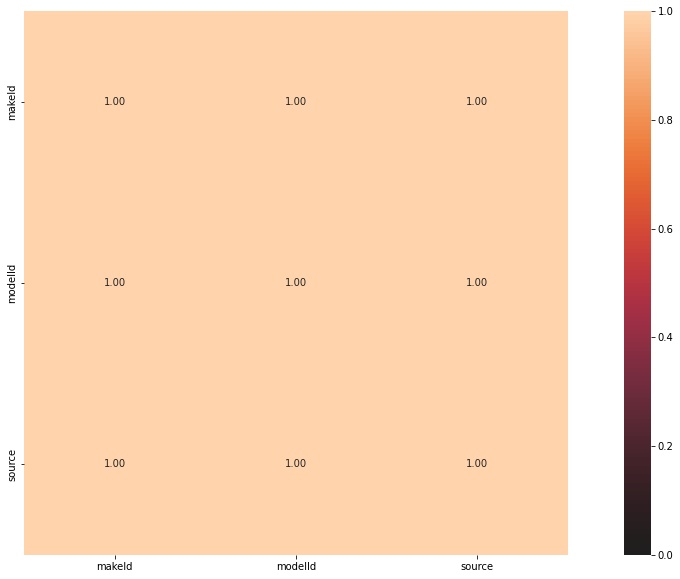

{'corr':            makeId   modelId    source
 makeId   1.000000  0.999898  0.999898
 modelId  0.999898  1.000000  0.999898
 source   0.999898  0.999898  1.000000,
 'ax': <AxesSubplot:>}

In [35]:
df_step = df[["makeId", "modelId", "source"]]
nominal.associations(df_step, figsize=(20, 10))


In [36]:
to_drop = [
    "makeId",
    "modelId",
]


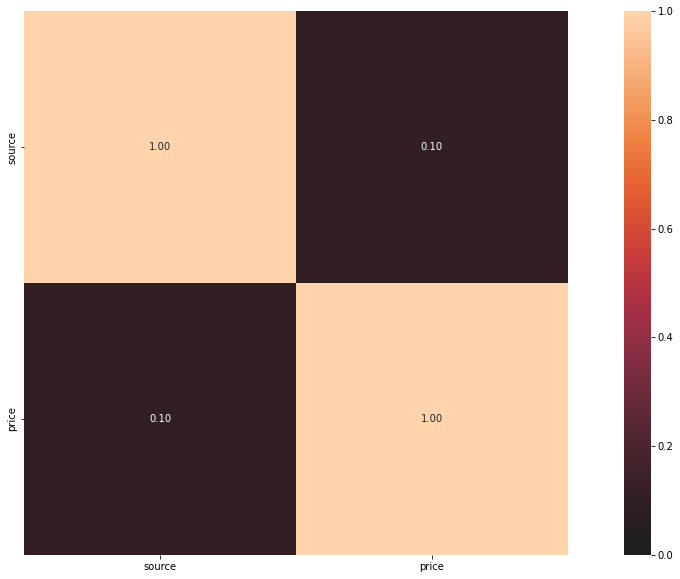

{'corr':           source     price
 source  1.000000  0.103918
 price   0.103918  1.000000,
 'ax': <AxesSubplot:>}

In [37]:
df_step = df[["source", "price"]]
nominal.associations(df_step, figsize=(20, 10))


In [38]:
# Weak relation
to_drop.append("source")


### URN

In [39]:
mask = df["urn"].isnull()
df.loc[~mask]["urn"].unique()


array(['id:ad:456347486:list:411682484', 'id:ad:446139206:list:402055704',
       'id:ad:453716498:list:409229341', ...,
       'id:ad:460657025:list:415720555', 'id:ad:464182483:list:419045677',
       'id:ad:463227571:list:418146724'], dtype=object)

In [40]:
# Let's try to split URN and search for relations
import numpy as np


def getAdListColumn(row):
    if not pd.isnull(row["urn"]):
        complete = str(row["urn"])
        ad = complete.split(":")[2]
        list = complete.split(":")[4]
        row["ad"] = ad
        row["list"] = list
    else:
        row["ad"] = np.nan
        row["list"] = np.nan
    return row


df = df.apply(getAdListColumn, axis=1)
mask = df["urn"].isnull()
df.loc[~mask][["urn", "ad", "list"]]


,urn,ad,list
16533,id:ad:456347486:list:411682484,456347486,411682484
25523,id:ad:446139206:list:402055704,446139206,402055704
25522,id:ad:453716498:list:409229341,453716498,409229341
25521,id:ad:453772671:list:409283471,453772671,409283471
18923,id:ad:457942312:list:413157473,457942312,413157473
...,...,...,...
18861,id:ad:460657025:list:415720555,460657025,415720555
18858,id:ad:465498450:list:420304601,465498450,420304601
18859,id:ad:464182483:list:419045677,464182483,419045677
18856,id:ad:462382349:list:417351006,462382349,417351006


In [41]:
print(len(df["urn"].unique()))
print(len(df["ad"].unique()))
print(len(df["list"].unique()))


1572
1572
1572


In [42]:
# No interesting info

adList = df["ad"].tolist()
listList = df["list"].tolist()

for list in listList:
    if list in adList:
        print(list)

for ad in adList:
    if ad in listList:
        print(ad)


In [43]:
# Still, ads with same urn seem to be duplicates
df_agg = df.groupby("urn")

df["idDupli"] = df.index.copy()
dupliId = np.max(df["idDupli"]) + 1

for name, single_group in df_agg:
    if len(single_group) > 1:
        df.loc[single_group.index, "idDupli"] = dupliId
        dupliId += 1


elencoDupli = []
for id in df["idDupli"].unique():
    if len(df[df["idDupli"] == id]) > 1:
        elencoDupli.append(tuple((id, len(df[df["idDupli"] == id]))))

elencoDupli.sort(key=lambda x: x[1])
print(elencoDupli)


[(27818, 2), (27831, 2), (27836, 2), (27814, 2), (27793, 2), (27849, 2), (27850, 2), (27791, 2), (27824, 2), (27835, 2), (27830, 2), (27851, 2), (27853, 2), (27827, 2), (27810, 2), (27819, 2), (27796, 2), (27803, 2), (27837, 2), (27844, 2), (27828, 2), (27816, 2), (27807, 2), (27809, 2), (27834, 2), (27859, 2), (27794, 2), (27806, 2), (27852, 2), (27795, 2), (27858, 2), (27825, 2), (27841, 2), (27805, 2), (27820, 2), (27832, 2), (27815, 2), (27822, 2), (27801, 2), (27808, 2), (27812, 2), (27817, 2), (27847, 2), (27840, 2), (27838, 2), (27848, 2), (27821, 2), (27799, 2), (27843, 2), (27854, 2), (27811, 2), (27792, 2), (27798, 2), (27856, 2), (27833, 2), (27845, 2), (27829, 2), (27846, 2), (27813, 2), (27823, 2), (27800, 2), (27839, 3), (27857, 3), (27855, 3), (27842, 3), (27826, 3), (27802, 3), (27797, 3), (27804, 3)]


In [44]:
# Particular types of duplicates
df.loc[df["idDupli"] == 27814, :]


,Unnamed: 0,ecoClass,weight,seller,updatedAt,sellerType,source,color,cylinders,gears,description,makeId,doors,bodyType,kw,title,co2Emissions,urn,consumption,forNoviceDrivers,year,price,km,engineSize,createdAt,status,seats,supply,gearType,doc_id,modelId,created_dt,citta,dataCreazione,dataUpdate,idDupli,ad,list
25527,28283,NaN,NaN,Lorenzo,2022-02-15T18:43:04Z,Privato,a,NaN,NaN,NaN,Alfa Romeo Giulietta anni '80 conservata. Vers...,a-000083,NaN,NaN,NaN,ALFA ROMEO Giulietta - 1980,NaN,id:ad:461929816:list:416922710,NaN,NaN,1980.0,6650,80000.0,NaN,2022-01-03T14:05:33Z,ONLINE,NaN,NaN,NaN,84704459f05575eae5dec7e3e3469f7a1d29a1bdc88dbc...,a-000313,2022-01-03 14:05:33+00:00,benevento,2022-01-03,2022-02-15,27814,461929816,416922710
18966,21292,NaN,NaN,Lorenzo,2022-02-10T09:09:43Z,Privato,a,NaN,NaN,NaN,"Alfa Romeo Giulietta anni 80 conservata, versi...",a-000083,NaN,NaN,NaN,ALFA ROMEO Giulietta - 1980,NaN,id:ad:461929816:list:416922710,NaN,NaN,1980.0,4650,80000.0,NaN,2022-01-03T14:05:33Z,OFFLINE,NaN,NaN,NaN,22159a77f87e2b7161b978d62c11b6ac1e1c1a7278ef5f...,a-000313,2022-01-03 14:05:33+00:00,benevento,2022-01-03,2022-02-10,27814,461929816,416922710


In [45]:
df = df.sort_values("dataUpdate", ascending=False).drop_duplicates(
    "idDupli", keep="first"
)


In [46]:
print("n rows:", len(df))


n rows: 23957


In [47]:
to_drop.append("urn")
to_drop.append("ad")
to_drop.append("list")
to_drop.append("idDupli")


### "Unnamed: 0", "doc_id"

In [48]:
print(len(df["Unnamed: 0"].unique()))
print(len(df["doc_id"].unique()))


23957
23957


In [49]:
# only unique, no use
to_drop.append("Unnamed: 0")
to_drop.append("doc_id")


### ForNoviceDrivers

In [50]:
df["forNoviceDrivers"].value_counts(dropna=False)


NaN     23955
True        2
Name: forNoviceDrivers, dtype: int64

In [51]:
# Only two non null values!
to_drop.append("forNoviceDrivers")


### Status

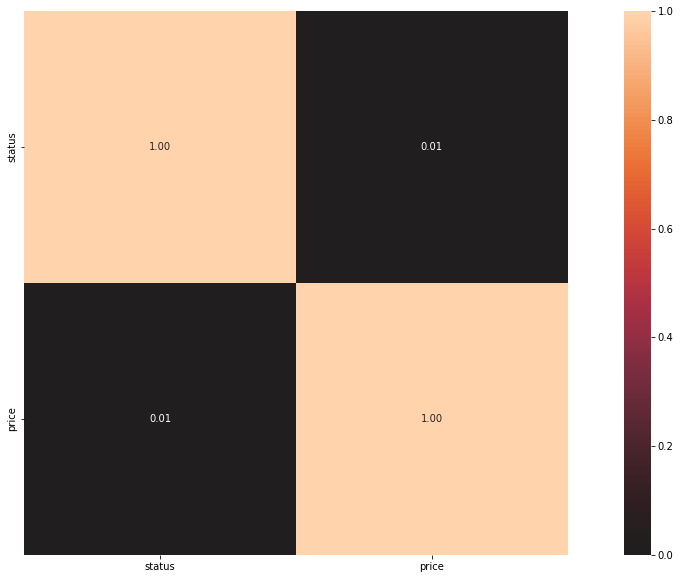

{'corr':           status     price
 status  1.000000  0.014176
 price   0.014176  1.000000,
 'ax': <AxesSubplot:>}

In [52]:
df_step = df[["status", "price"]]
nominal.associations(df_step, figsize=(20, 10))


In [53]:
# Not useful
to_drop.append("status")


### Weight, Engine Size, Emissions, Consumptions

In [54]:
# Many nulls, some mistakes
df["weight"].value_counts(dropna=False)


NaN       18502
1385.0     2263
1395.0     1167
1355.0      653
1392.0      281
1365.0      249
1320.0      186
1310.0      178
1410.0      127
1317.0      101
1415.0       93
1280.0       51
1465.0       28
1475.0       26
1305.0        9
1335.0        5
1380.0        5
1300.0        5
1290.0        5
1400.0        3
1140.0        3
1170.0        3
1350.0        2
1390.0        2
1850.0        1
1495.0        1
900.0         1
3095.0        1
1700.0        1
1250.0        1
1449.0        1
1485.0        1
1430.0        1
1200.0        1
Name: weight, dtype: int64

In [55]:
# clean the clear error
df.loc[df["weight"] == 3095.0, "weight"] = np.nan


In [56]:
# Many nulls, some mistakes
df["engineSize"].value_counts(dropna=False)


NaN       16378
1598.0     3919
1368.0     1842
1956.0     1376
1742.0      184
1600.0       97
2000.0       38
1400.0       35
1570.0       14
11.0         10
1779.0        8
1750.0        6
1290.0        5
1800.0        5
1300.0        5
1995.0        5
1962.0        4
1900.0        3
1357.0        2
1580.0        2
1998.0        2
16.0          2
1595.0        2
1.0           1
1364.0        1
1559.0        1
2200.0        1
1850.0        1
2143.0        1
2.0           1
1596.0        1
14.0          1
1996.0        1
1581.0        1
13.0          1
1590.0        1
Name: engineSize, dtype: int64

In [57]:
# Let's normalize
def correctEngineSize(row):
    if not pd.isnull(row["engineSize"]):
        if row["engineSize"] < 10:
            row["engineSize"] = row["engineSize"] * 1000
            return row
        if row["engineSize"] < 100:
            row["engineSize"] = row["engineSize"] * 100
            return row
    return row


df = df.apply(correctEngineSize, axis=1)
df["engineSize"].value_counts()


1598.0    3919
1368.0    1842
1956.0    1376
1742.0     184
1600.0      99
2000.0      39
1400.0      36
1570.0      14
1100.0      10
1779.0       8
1300.0       6
1750.0       6
1995.0       5
1290.0       5
1800.0       5
1962.0       4
1900.0       3
1357.0       2
1998.0       2
1595.0       2
1580.0       2
1581.0       1
1996.0       1
1596.0       1
2143.0       1
1850.0       1
2200.0       1
1559.0       1
1364.0       1
1000.0       1
1590.0       1
Name: engineSize, dtype: int64

In [58]:
# Many nulls, some mistakes
df["co2Emissions"].value_counts(dropna=False)


NaN      17890
103.0     1176
114.0      690
104.0      643
119.0      508
134.0      423
149.0      397
123.0      331
124.0      320
110.0      246
144.0      190
133.0      168
125.0      159
157.0      124
113.0       84
177.0       81
118.0       78
116.0       71
148.0       61
127.0       48
164.0       48
159.0       39
121.0       33
99.0        31
162.0       27
147.0       20
131.0       19
122.0       16
130.0       12
167.0        5
120.0        4
145.0        2
141.0        2
109.0        1
5.0          1
179.0        1
4.0          1
168.0        1
1.0          1
80.0         1
12.0         1
0.0          1
143.0        1
79.0         1
Name: co2Emissions, dtype: int64

In [59]:
# set boundary
df.loc[df["co2Emissions"] < 70, "co2Emissions"] = np.nan


In [60]:
# Many nulls, some mistakes
df["kw"].value_counts(dropna=False)


NaN         12011
88.0000      4872
77.0000      2296
125.0000      984
88.2600       822
            ...  
57.0000         1
11.0325         1
96.3505         1
444.9775        1
104.0000        1
Name: kw, Length: 98, dtype: int64

In [61]:
# Set boundary
df.loc[df["kw"] > 130, "kw"] = np.nan


In [62]:
# Many nulls, some mistakes. Let's try to only consider urban consumption
df["consumption"].value_counts(dropna=False)


NaN                                                                           17780
3,9 l/100 km (comb.)\n4,9 l/100 km (urbano)\n3,3 l/100 km (extraurbano)         664
4,4 l/100 km (comb.)\n5,5 l/100 km (urbano)\n3,7 l/100 km (extraurbano)         628
4 l/100 km (comb.)\n5 l/100 km (urbano)\n3,4 l/100 km (extraurbano)             511
4,5 l/100 km (comb.)\n5,6 l/100 km (urbano)\n3,9 l/100 km (extraurbano)         337
                                                                              ...  
4,5 l/100 km (comb.)\n5,5 l/100 km (urbano)\n4,1 l/100 km (extraurbano)           1
4,2 l/100 km (comb.)\n5,3 l/100 km (urbano)\n3,5 l/100 km (extraurbano)           1
4,5 l/100 km (comb.)\n3,9 l/100 km (urbano)\n5,9 l/100 km (extraurbano)           1
7,2 kg/100 km (comb.)\n8,9 kg/100 km (urbano)\n6,2 kg/100 km (extraurbano)        1
4,5 l/100 km (comb.)\n5,8 l/100 km (urbano)\n5,8 l/100 km (extraurbano)           1
Name: consumption, Length: 188, dtype: int64

In [63]:
def getConsumoUrbano(row):
    if not pd.isnull(row["consumption"]):
        try:
            temp = str(row["consumption"]).split("(comb.)")[1].strip()
            row["consumption"] = temp.split("(urbano)")[0].strip()
        except:
            row["consumption"] = np.nan
    return row


df = df.apply(getConsumoUrbano, axis=1)


In [64]:
df["consumption"].value_counts(dropna=False)


NaN             18030
5 l/100 km       1024
4,9 l/100 km      698
5,5 l/100 km      675
5,8 l/100 km      438
                ...  
12 l/100 km         1
7,2 l/100 km        1
22 l/100 km         1
6,8 l/100 km        1
11 l/100 km         1
Name: consumption, Length: 69, dtype: int64

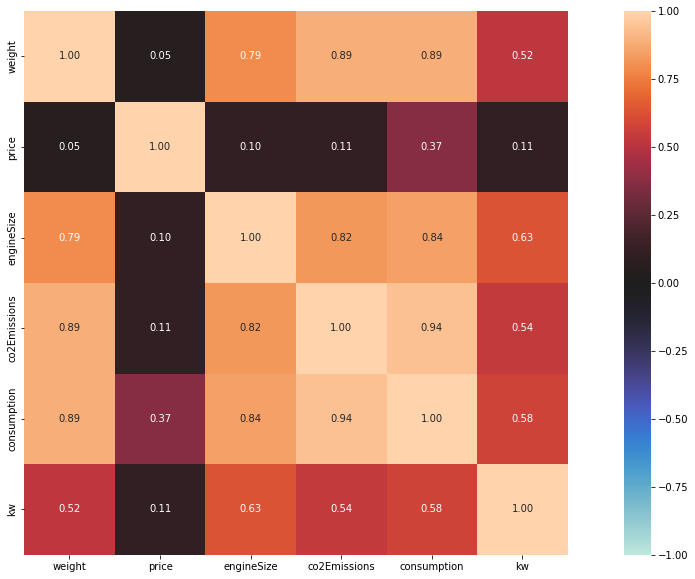

{'corr':                 weight     price  engineSize  co2Emissions  consumption  \
 weight        1.000000  0.053305    0.790621      0.887884     0.886803   
 price         0.053305  1.000000    0.103621      0.105677     0.371450   
 engineSize    0.790621  0.103621    1.000000      0.822834     0.844868   
 co2Emissions  0.887884  0.105677    0.822834      1.000000     0.943722   
 consumption   0.886803  0.371450    0.844868      0.943722     1.000000   
 kw            0.519558  0.105528    0.627682      0.537284     0.578042   
 
                     kw  
 weight        0.519558  
 price         0.105528  
 engineSize    0.627682  
 co2Emissions  0.537284  
 consumption   0.578042  
 kw            1.000000  ,
 'ax': <AxesSubplot:>}

In [65]:
df_step = df[["weight", "price", "engineSize", "co2Emissions", "consumption", "kw"]]
nominal.associations(df_step, figsize=(20, 10))


In [66]:
# Too many nulls and not so strong relations with price
to_drop.append("weight")
to_drop.append("engineSize")
to_drop.append("co2Emissions")
to_drop.append(
    "consumption"
)
to_drop.append("kw")


### Year

In [67]:
df["year"].value_counts(dropna=False)


2011.0    3629
2012.0    3342
2013.0    2477
2016.0    2427
2015.0    2345
2014.0    2059
2017.0    1894
2018.0    1540
2010.0    1539
2019.0    1036
2020.0     934
2021.0     137
1982.0      62
1983.0      60
1985.0      52
NaN         50
1978.0      49
1980.0      47
1984.0      43
1979.0      37
1981.0      31
1960.0      24
1959.0      23
1961.0      21
1986.0      17
1963.0      16
1958.0      10
1962.0       9
1970.0       7
1977.0       6
1964.0       5
1976.0       4
1950.0       4
1975.0       3
2009.0       3
1987.0       3
2022.0       2
1965.0       2
2008.0       2
1957.0       1
1955.0       1
2004.0       1
1956.0       1
2001.0       1
1974.0       1
Name: year, dtype: int64

In [68]:
df["year"] = df["year"].fillna(df["year"].mean())
df["year"] = pd.qcut(df["year"], 7)
df["year"].value_counts()


(1949.999, 2011.0]    5714
(2013.0, 2015.0]      4454
(2016.0, 2018.0]      3434
(2011.0, 2012.0]      3342
(2012.0, 2013.0]      2477
(2015.0, 2016.0]      2427
(2018.0, 2022.0]      2109
Name: year, dtype: int64

### Cylinders, Gears, Seats

In [69]:
df["cylinders"].value_counts(dropna=False)


NaN     17730
4.0      6222
6.0         2
16.0        1
5.0         1
0.0         1
Name: cylinders, dtype: int64

In [70]:
df["gears"].value_counts(dropna=False)


NaN    17574
6.0     6331
5.0       42
1.0        5
4.0        3
7.0        2
Name: gears, dtype: int64

In [71]:
df["seats"].value_counts()


5.0    19208
4.0      127
6.0       29
2.0       12
3.0        1
Name: seats, dtype: int64

In [72]:
to_drop.append("cylinders")
to_drop.append("gears")
to_drop.append("seats")


### KM

In [73]:
df["km"].value_counts(dropna=False)


140000.0    416
150000.0    413
160000.0    406
130000.0    393
120000.0    320
           ... 
120853.0      1
96794.0       1
1251.0        1
181759.0      1
123431.0      1
Name: km, Length: 3782, dtype: int64

In [74]:
df["km"] = df["km"].fillna(df["km"].mean())
df["km"] = pd.qcut(df["km"], q=6)
df["km"].value_counts(dropna=False)


(113076.0, 140000.0]      4266
(49000.0, 86000.0]        4037
(-0.001, 49000.0]         4005
(86000.0, 113076.0]       3938
(170000.0, 99999999.0]    3927
(140000.0, 170000.0]      3784
Name: km, dtype: int64

### Eco Class

In [75]:
df["ecoClass"].value_counts(dropna=False)


Euro 5          8837
Euro 6          7289
NaN             6778
Euro 6d-TEMP     575
Pre-Euro         169
Euro 4           161
Euro 1            57
Euro 6d           47
Euro 3            20
Euro 6c           17
Euro 2             7
Name: ecoClass, dtype: int64

In [76]:
mask = (
    (df["ecoClass"] == "Euro 6d-TEMP")
    | (df["ecoClass"] == "Euro 6d")
    | (df["ecoClass"] == "Euro 6c")
)
df.loc[mask, "ecoClass"] = "Euro 6"
df["ecoClass"].value_counts(dropna=False)


Euro 5      8837
Euro 6      7928
NaN         6778
Pre-Euro     169
Euro 4       161
Euro 1        57
Euro 3        20
Euro 2         7
Name: ecoClass, dtype: int64

In [77]:
print(pd.crosstab(df["ecoClass"], df["year"], margins=True))


year      (1949.999, 2011.0]  (2011.0, 2012.0]  (2012.0, 2013.0]  \
ecoClass                                                           
Euro 1                    16                 3                15   
Euro 2                     5                 0                 0   
Euro 3                     9                 4                 4   
Euro 4                    95                21                22   
Euro 5                  3173              2187              1498   
Euro 6                   181               158               173   
Pre-Euro                 166                 2                 1   
All                     3645              2375              1713   

year      (2013.0, 2015.0]  (2015.0, 2016.0]  (2016.0, 2018.0]  \
ecoClass                                                         
Euro 1                  23                 0                 0   
Euro 2                   2                 0                 0   
Euro 3                   2                 1           

In [78]:
mask = df["ecoClass"].isnull()
df.loc[mask, "year"].value_counts()


(1949.999, 2011.0]    2069
(2013.0, 2015.0]      1206
(2011.0, 2012.0]       967
(2012.0, 2013.0]       764
(2018.0, 2022.0]       678
(2016.0, 2018.0]       618
(2015.0, 2016.0]       476
Name: year, dtype: int64

In [79]:
def fillNanEcoClass(row):
    if pd.isnull(row["ecoClass"]):
        if row["year"] == "(2004.0, 2013.0]":
            row["ecoClass"] = "Euro 5"
        elif row["year"] == "(2013.0, 2022.0]":
            row["ecoClass"] = "Euro 6"
        else:
            row["ecoClass"] = "Pre-Euro 4"
    elif row["ecoClass"] in ["Euro 1", "Euro 2", "Euro 3", "Euro 4", "Pre-Euro"]:
        row["ecoClass"] = "Pre-Euro 4"
    return row


df = df.apply(fillNanEcoClass, axis=1)
df["ecoClass"].value_counts(dropna=False)


Euro 5        8837
Euro 6        7928
Pre-Euro 4    7192
Name: ecoClass, dtype: int64

### Seller e Seller Type

In [80]:
len(df["seller"].unique())


6550

In [81]:
to_drop.append("seller")


In [82]:
df["sellerType"].value_counts(dropna=False)


Privato    8973
Azienda    8078
NaN        6906
Name: sellerType, dtype: int64

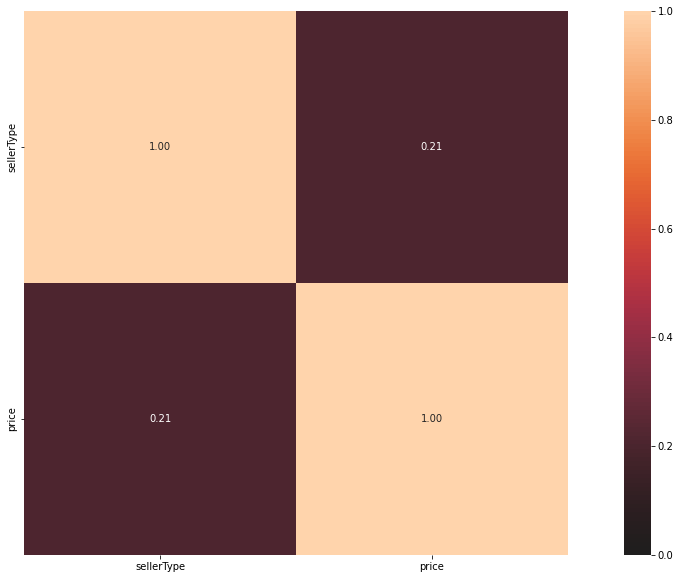

{'corr':             sellerType     price
 sellerType    1.000000  0.209842
 price         0.209842  1.000000,
 'ax': <AxesSubplot:>}

In [83]:
df_step = df[["sellerType", "price"]]
nominal.associations(df_step, figsize=(20, 10))


In [84]:
# Not a strong relation
to_drop.append("sellerType")


### Color

In [85]:
df["color"].value_counts(dropna=False)


NaN            17177
Bianco          1991
Nero            1597
Grigio          1538
Rosso            664
Argento          484
Blu/Azzurro      402
Marrone           44
Bronzo            18
Verde             17
Beige             15
Lilla              6
Arancione          2
Oro                1
Giallo             1
Name: color, dtype: int64

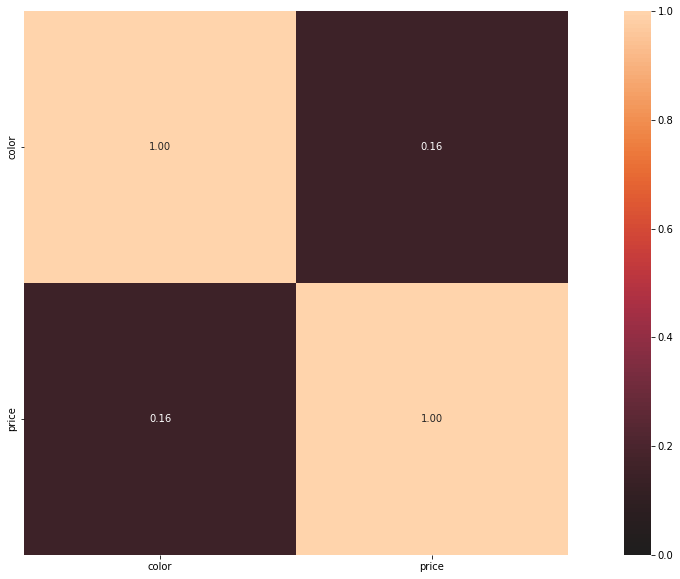

{'corr':           color     price
 color  1.000000  0.155525
 price  0.155525  1.000000,
 'ax': <AxesSubplot:>}

In [86]:
df_step = df[["color", "price"]]
nominal.associations(df_step, figsize=(20, 10))


In [87]:
to_drop.append("color")
# Weak relation, I expected a stronger one here


### Description, Title

In [88]:
to_drop.append("description") #futue idea: scrape description and title and search for something interesting
to_drop.append("title")


### Doors

In [89]:
df["doors"].value_counts(dropna=False)


[4, 5]    13636
5          6368
NaN        3709
4           175
[2, 3]       46
[6, 7]       12
3             8
2             3
Name: doors, dtype: int64

In [90]:
df.loc[(df["doors"] == "4") | (df["doors"] == "5"), "doors"] = "[4, 5]"
df.loc[(df["doors"] == "2") | (df["doors"] == "3"), "doors"] = "[2, 3]"
df.loc[df["doors"] == "[6, 7]", "doors"] = np.nan
df["doors"].value_counts(dropna=False)


[4, 5]    20179
NaN        3721
[2, 3]       57
Name: doors, dtype: int64

In [91]:
# Basically only one class
to_drop.append("doors")


### Body Type

In [92]:
df["bodyType"].value_counts(dropna=False)


Berlina                    17651
NaN                         3939
Utilitaria                  1309
Altro                        872
Coupé                        129
Monovolume                    23
Cabrio                        15
Station-wagon                 10
SUV/Fuoristrada/Pick-up        9
Name: bodyType, dtype: int64

In [93]:
print(pd.crosstab(df["bodyType"], df["year"], margins=True))


year                     (1949.999, 2011.0]  (2011.0, 2012.0]  \
bodyType                                                        
Altro                                   239               121   
Berlina                                3820              2369   
Cabrio                                    6                 0   
Coupé                                    45                10   
Monovolume                                3                 7   
SUV/Fuoristrada/Pick-up                   3                 1   
Station-wagon                             0                 4   
Utilitaria                              390               236   
All                                    4506              2748   

year                     (2012.0, 2013.0]  (2013.0, 2015.0]  (2015.0, 2016.0]  \
bodyType                                                                        
Altro                                  76               153                65   
Berlina                              1741

In [94]:
# Filling nans using the year
mask = (df["bodyType"].isnull()) & (df["year"].apply(str) == "(2004.0, 2013.0]")
df.loc[mask, "bodyType"] = "Utilitaria"
mask = (df["bodyType"].isnull()) & (df["year"].apply(str) == "(2013.0, 2022.0]")
df.loc[mask, "bodyType"] = "Berlina"
mask = (
    df["bodyType"].isnull()
    | (df["bodyType"] == "Coupé")
    | (df["bodyType"] == "Monovolume")
    | (df["bodyType"] == "Cabrio")
    | (df["bodyType"] == "Station-wagon")
    | (df["bodyType"] == "SUV/Fuoristrada/Pick-up")
)
df.loc[mask, "bodyType"] = "Altro"
df["bodyType"].value_counts(dropna=False)


Berlina       17651
Altro          4997
Utilitaria     1309
Name: bodyType, dtype: int64

### Supply

In [95]:
df["supply"].value_counts(dropna=False)


Diesel       17671
Benzina       3639
NaN           1806
GPL            705
Altro           94
Metano          40
Elettrica        2
Name: supply, dtype: int64

In [96]:
# Filling nans tryign to keep the same distribution
diesel = len(df[df["supply"] == "Diesel"])
benzina = len(df[df["supply"] == "Benzina"])
df_random = df[df["supply"].isnull()].sample(frac=benzina / (diesel + benzina))
df.loc[df_random.index, "supply"] = "Benzina"
df.loc[df["supply"].isnull(), "supply"] = "Diesel"
df["supply"].value_counts(dropna=False)


Diesel       19169
Benzina       3947
GPL            705
Altro           94
Metano          40
Elettrica        2
Name: supply, dtype: int64

### Gear Type

In [97]:
df["gearType"].value_counts(dropna=False)


Manuale           19227
Automatico         2306
NaN                1715
Semiautomatico      370
Sequenziale         327
Altro                12
Name: gearType, dtype: int64

In [98]:
print(pd.crosstab(df["gearType"], df["year"], margins=True))


year            (1949.999, 2011.0]  (2011.0, 2012.0]  (2012.0, 2013.0]  \
gearType                                                                 
Altro                            1                 0                 2   
Automatico                      76               284               157   
Manuale                       4973              2712              2079   
Semiautomatico                   8                39                22   
Sequenziale                     15                40                13   
All                           5073              3075              2273   

year            (2013.0, 2015.0]  (2015.0, 2016.0]  (2016.0, 2018.0]  \
gearType                                                               
Altro                          1                 0                 1   
Automatico                   316               383               545   
Manuale                     3701              1810              2630   
Semiautomatico                89               

In [99]:
mask = (df["gearType"].isnull()) & (df["year"].apply(str) != "(2013.0, 2022.0]")
df.loc[mask, "gearType"] = "Manuale"
df["gearType"].value_counts(dropna=False)


Manuale           20942
Automatico         2306
Semiautomatico      370
Sequenziale         327
Altro                12
Name: gearType, dtype: int64

In [100]:
mask = (df["gearType"] == "Semiautomatico") | (df["gearType"] == "Sequenziale")
df.loc[mask, "gearType"] = "Altro"
df["gearType"].value_counts(dropna=False)


Manuale       20942
Automatico     2306
Altro           709
Name: gearType, dtype: int64

In [101]:
# Filling nans
lm = len(df[df["gearType"] == "Manuale"])
lau = len(df[df["gearType"] == "Automatico"])
lal = len(df[df["gearType"] == "Altro"])

df_random = df[df["gearType"].isnull()].sample(frac=lal / (lal + lau + lm))
df.loc[df_random.index, "gearType"] = "Altro"
df_random = df[df["gearType"].isnull()].sample(frac=lau / (lal + lau + lm))
df.loc[df_random.index, "gearType"] = "Automatico"
df.loc[df["gearType"].isnull(), "gearType"] = "Manuale"
df["gearType"].value_counts(dropna=False)


Manuale       20942
Automatico     2306
Altro           709
Name: gearType, dtype: int64

### Date

In [102]:
df[["updatedAt", "createdAt", "created_dt", "dataCreazione", "dataUpdate"]]


,updatedAt,createdAt,created_dt,dataCreazione,dataUpdate
7209,2022-03-16T09:09:22Z,2022-01-27T10:48:16Z,2022-01-27 10:48:16+00:00,2022-01-27,2022-03-16
2743,2022-03-16T09:21:11Z,2022-01-27T10:56:49Z,2022-01-27 10:56:49+00:00,2022-01-27,2022-03-16
4548,2022-03-16T09:17:16Z,2022-01-27T10:53:34Z,2022-01-27 10:53:34+00:00,2022-01-27,2022-03-16
4547,2022-03-16T09:14:46Z,2022-01-27T10:53:38Z,2022-01-27 10:53:38+00:00,2022-01-27,2022-03-16
4546,2022-03-16T09:07:51Z,2022-01-27T10:47:44Z,2022-01-27 10:47:44+00:00,2022-01-27,2022-03-16
...,...,...,...,...,...
21974,2021-05-22T21:31:03Z,2021-03-25T13:51:13Z,2021-03-25 13:51:13+00:00,2021-03-25,2021-05-22
13104,2021-05-22T21:15:11Z,2021-05-16T11:33:18Z,2021-05-16 11:33:18+00:00,2021-05-16,2021-05-22
21958,2021-05-22T21:29:30Z,2021-04-01T18:30:30Z,2021-04-01 18:30:30+00:00,2021-04-01,2021-05-22
21938,2021-05-22T21:27:22Z,2021-04-13T01:25:58Z,2021-04-13 01:25:58+00:00,2021-04-13,2021-05-22


In [103]:
to_drop.append("createdAt")
to_drop.append("created_dt")
to_drop.append("updatedAt")
to_drop.append("dataCreazione")


In [104]:
df = df.rename(columns={"dataUpdate": "data"})
#From now on this is the ad date!

### Price

In [105]:
df["price"].value_counts(dropna=False)


8500     808
7500     785
6500     643
8000     515
9500     515
        ... 
16899      1
33000      1
3190       1
6666       1
16190      1
Name: price, Length: 865, dtype: int64

In [106]:
df.loc[df["price"] < 500, "price"]


16427    110
9520     160
9599     170
11680    180
24811    123
23817    399
5014       1
25663    150
21987    272
12706    300
19277    299
14796    140
21260    250
14857    200
8407     280
22375    111
17984    450
19982    400
17419    150
19538    110
26327      1
13071    180
Name: price, dtype: int64

In [107]:
# Set a boundary
df.loc[df["price"] < 250, "price"] = 250


### Check point

In [108]:
os.makedirs("../Dataframes", exist_ok=True)
df.to_csv("../Dataframes/df_pulito.csv", index=False)


In [109]:
# df = pd.read_csv("../Dataframes/df_pulito.csv")


## Selecting features
We did clean the data applying some sort of feature selection: only the features that seem to have a strong impact on the price were kept.

In [110]:
df.drop(to_drop, inplace=True, axis=1)

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23957 entries, 7209 to 21875
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype                   
---  ------    --------------  -----                   
 0   ecoClass  23957 non-null  object                  
 1   bodyType  23957 non-null  object                  
 2   year      23957 non-null  interval[float64, right]
 3   price     23957 non-null  int64                   
 4   km        23957 non-null  interval[float64, right]
 5   supply    23957 non-null  object                  
 6   gearType  23957 non-null  object                  
 7   citta     23957 non-null  object                  
 8   data      23957 non-null  datetime64[ns]          
dtypes: datetime64[ns](1), int64(1), interval(2), object(5)
memory usage: 2.7+ MB


In [112]:
df["year"] = df["year"].astype("str")
df["km"] = df["km"].astype("str")
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23957 entries, 7209 to 21875
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ecoClass  23957 non-null  object        
 1   bodyType  23957 non-null  object        
 2   year      23957 non-null  object        
 3   price     23957 non-null  int64         
 4   km        23957 non-null  object        
 5   supply    23957 non-null  object        
 6   gearType  23957 non-null  object        
 7   citta     23957 non-null  object        
 8   data      23957 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.3+ MB


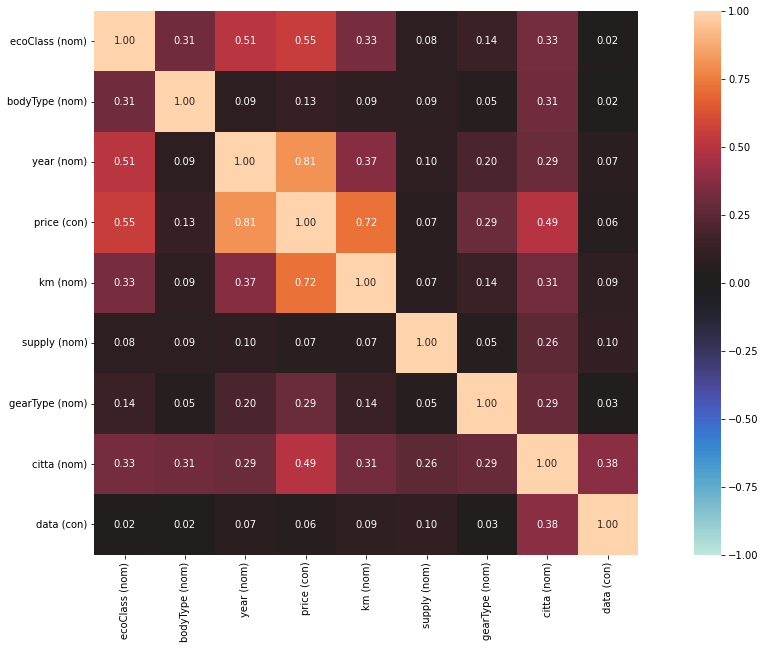

{'corr':                 ecoClass (nom)  bodyType (nom)  year (nom)  price (con)  \
 ecoClass (nom)        1.000000        0.305184    0.505025     0.549401   
 bodyType (nom)        0.305184        1.000000    0.093269     0.129413   
 year (nom)            0.505025        0.093269    1.000000     0.806932   
 price (con)           0.549401        0.129413    0.806932     1.000000   
 km (nom)              0.331182        0.093897    0.370416     0.720357   
 supply (nom)          0.080371        0.092226    0.100696     0.065894   
 gearType (nom)        0.137677        0.052954    0.201672     0.294755   
 citta (nom)           0.325596        0.309726    0.293287     0.493311   
 data (con)            0.024761        0.016679    0.074551     0.055496   
 
                 km (nom)  supply (nom)  gearType (nom)  citta (nom)  \
 ecoClass (nom)  0.331182      0.080371        0.137677     0.325596   
 bodyType (nom)  0.093897      0.092226        0.052954     0.309726   
 year (nom)   

In [113]:
nominal.associations(df, figsize=(20, 10), mark_columns=True)


In [114]:
# Let's keep only strong relations
to_drop = ["bodyType", "gearType", "supply"]
df.drop(to_drop, axis=1, inplace=True)


In [115]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23957 entries, 7209 to 21875
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ecoClass  23957 non-null  object        
 1   year      23957 non-null  object        
 2   price     23957 non-null  int64         
 3   km        23957 non-null  object        
 4   citta     23957 non-null  object        
 5   data      23957 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB


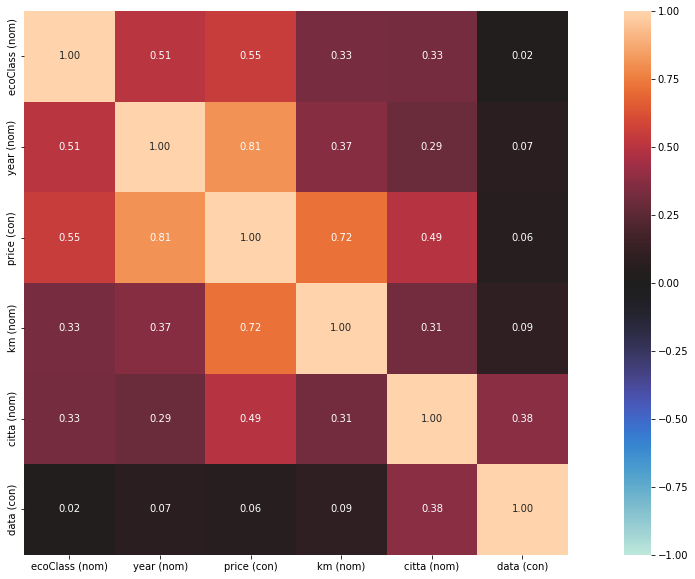

In [116]:
nominal.associations(df,figsize=(20,10),mark_columns=True);

### Check point

In [117]:
os.makedirs("../Dataframes", exist_ok=True)
df.to_csv("../Dataframes/df_precluster.csv", index=False)


In [ ]:
#df = pd.read_csv("../Dataframes/df_precluster.csv")

## Clustering

### Introduction
Since we only have categorical features and to avoid an umbearable computational weight, I will go on with k-modes to create the clusters. This is a simple, but powerful, method to build easily interpretable clusters.

In [118]:
dfMatrix = df[["ecoClass", "year", "km", "citta"]]


### Number of clusters
Elbow method for number of clusters

In [119]:
# Scelta del numero di cluster
cost = []
K = range(1, 10)
for cluster in K:
    print("N clusters: ", cluster)
    print("---Creation of cluster")
    kmodes = KModes(n_jobs=-1, n_clusters=cluster, init="Huang", random_state=0)
    print("---Clustering")
    kmodes.fit_predict(dfMatrix)
    print("---Getting metrics")
    cost.append(kmodes.cost_)



N clusters:  1
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  2
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  3
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  4
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  5
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  6
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  7
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  8
---Creation of cluster
---Clustering
---Getting metrics
N clusters:  9
---Creation of cluster
---Clustering
---Getting metrics


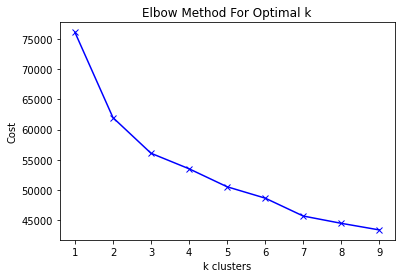

In [120]:
# It seems that 2-3 clusters could be the optimal number
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### Two clusters

#### Building clusters

In [121]:
# Costruzione dei cluster, in base al miglior numero di cluster secondo l'elbow
kmodes = KModes(n_jobs=-1, n_clusters=2, init="Huang", random_state=0)
kmodes.fit_predict(dfMatrix)


array([1, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [122]:
# Aggiungiamo i cluster al df originale
df["ClusterLabels"] = kmodes.labels_


#### Check point

In [123]:
os.makedirs('../Dataframes', exist_ok=True)  
df.to_csv('../Dataframes/df_clustered_2.csv', index = False)

In [380]:
# df = pd.read_csv("../Dataframes/df_clustered_2.csv")


#### Interpreting

##### Prep

In [124]:
# Let's add the info about geo-region
df_regione = pd.read_csv("../Dataset/province_regioni_italia.csv")
df_citta = pd.read_csv("../Dataset/comuni_italiani.csv")
df_citta = pd.merge(left = df_citta, right = df_regione, how = "left", left_on = "provincia", right_on = "Provincia")
df_citta["comune"] = df_citta["comune"].str.lower()
df_citta = df_citta[["comune", "Regione"]]
df_citta

,comune,Regione
0,abano terme,Veneto
1,abbadia cerreto,Lombardia
2,abbadia lariana,Lombardia
3,abbadia san salvatore,Toscana
4,abbasanta,Sardegna
...,...,...
7973,zuglio,Friuli-Venezia Giulia
7974,zumaglia,Piemonte
7975,zumpano,Calabria
7976,zungoli,Campania


In [125]:
df = pd.merge(left = df, right = df_citta, how = "left", left_on ="citta", right_on = "comune" )
df 

,ecoClass,year,price,km,citta,data,ClusterLabels,comune,Regione
0,Euro 5,"(2013.0, 2015.0]",11500,"(140000.0, 170000.0]",pogliano milanese,2022-03-16,1,pogliano milanese,Lombardia
1,Euro 6,"(2018.0, 2022.0]",19990,"(-0.001, 49000.0]",mantova,2022-03-16,0,mantova,Lombardia
2,Euro 6,"(2018.0, 2022.0]",15500,"(113076.0, 140000.0]",gallipoli,2022-03-16,0,gallipoli,Puglia
3,Euro 6,"(2016.0, 2018.0]",15500,"(49000.0, 86000.0]",parabita,2022-03-16,0,parabita,Puglia
4,Euro 5,"(2013.0, 2015.0]",9900,"(113076.0, 140000.0]",castenedolo,2022-03-16,1,castenedolo,Lombardia
...,...,...,...,...,...,...,...,...,...
23958,Pre-Euro 4,"(2012.0, 2013.0]",4500,"(170000.0, 99999999.0]",pomigliano d'arco,2021-05-22,1,pomigliano d'arco,Campania
23959,Pre-Euro 4,"(2011.0, 2012.0]",6500,"(140000.0, 170000.0]",torino,2021-05-22,0,torino,Piemonte
23960,Euro 6,"(2016.0, 2018.0]",13900,"(86000.0, 113076.0]",mongrando,2021-05-22,0,mongrando,Piemonte
23961,Euro 5,"(2013.0, 2015.0]",7900,"(170000.0, 99999999.0]",cavallino,2021-05-22,1,cavallino,Puglia


In [126]:
# Abbiamo qualche null, probabilmente dovuto a problemi di formati o a qualche perdita di info durante i merge
df.loc[df["Regione"].isnull(),"comune"].value_counts()

roma         663
monza         85
cesena        67
brugherio     31
ciampino      30
            ... 
lesmo          1
châtillon      1
ornavasso      1
predappio      1
masainas       1
Name: comune, Length: 154, dtype: int64

In [127]:
# filling nans
df.loc[df["comune"] == "roma", "Regione"] = "Lazio"
df.loc[df["comune"] == "monza", "Regione"] = "Lombardia"
df.loc[df["comune"] == "cesena", "Regione"] = "Emilia-Romagna"
df.loc[df["comune"] == "brugherio", "Regione"] = "Lombardia"
df.loc[df["comune"] == "ciampino", "Regione"] = "Lombardia"
df.loc[df["comune"] == "tivoli", "Regione"] = "Lombardia"
df.loc[df["comune"] == "fiumicino", "Regione"] = "Lazio"
df.loc[df["comune"] == "marino", "Regione"] = "Lazio"
df.loc[df["comune"] == "carrara", "Regione"] = "Toscana"
df.loc[df["comune"] == "fiumicino", "Regione"] = "Lazio"
df.loc[df["comune"] == "desio", "Regione"] = "Lombardia"
df.loc[df["comune"] == "busnago", "Regione"] = "Lombardia"
df["Regione"].mode()


0    Sicilia
Name: Regione, dtype: object

In [128]:
df.loc[df["Regione"].isnull(), "Regione"] = "Sicilia"


In [129]:
df.loc[df["Regione"].isnull(), "comune"].value_counts()


Series([], Name: comune, dtype: int64)

##### Viz

In [130]:
to_plot = ["ecoClass", "year", "km", "Regione"]


In [132]:
n_cluster0 = len(df[df["ClusterLabels"] == 0])
n_cluster1 = len(df[df["ClusterLabels"] == 1])
print("cluster 0 has:", n_cluster0, "ads")
print("cluster 1 has:", n_cluster1, "ads")


cluster 0 has: 12540 ads
cluster 1 has: 11423 ads


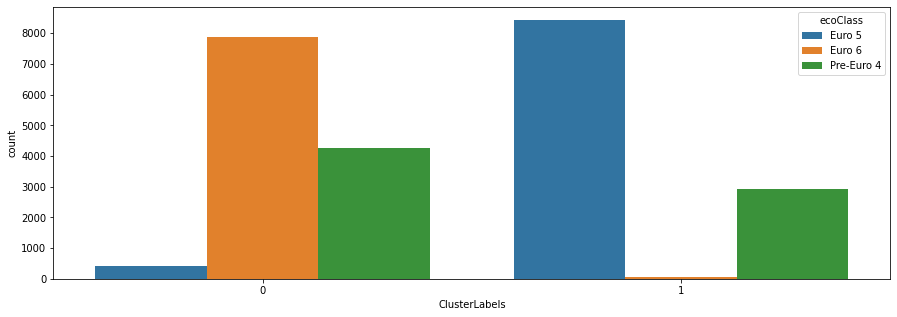

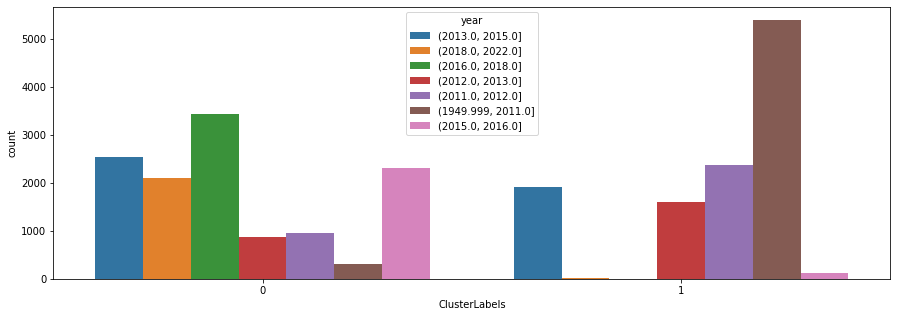

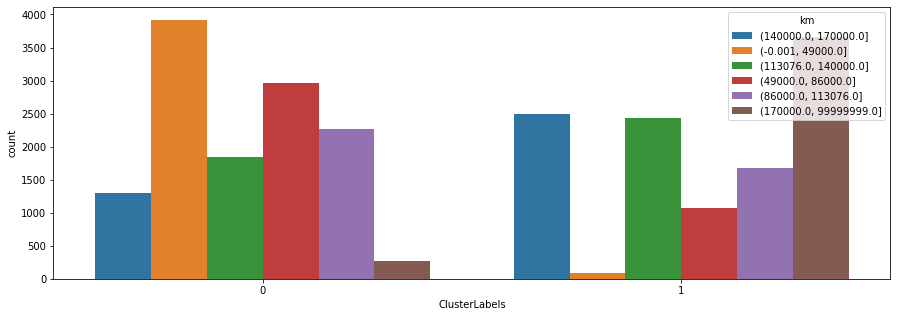

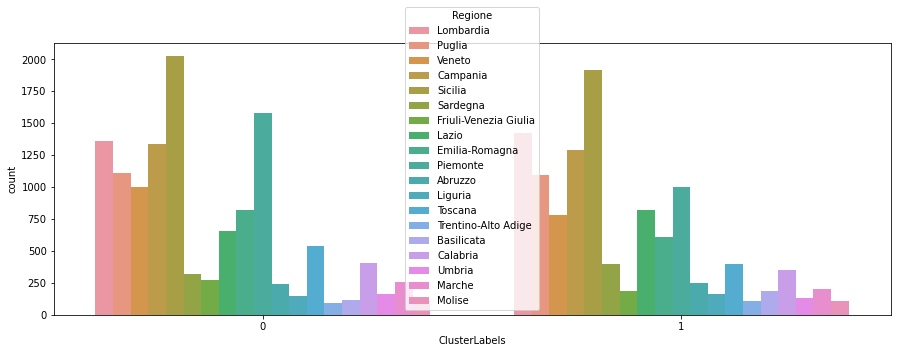

In [133]:
for col in to_plot:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='ClusterLabels',hue=col, data = df)
    plt.show()

##### Remarks
The graphs make it quite easy to understand what we obtained with the clusters. Let's try to analyze the price per cluster overy the year

#### Price trend

##### Preparation

In [134]:
datetime_min = datetime.strptime("Feb 1 2021", "%b %d %Y")
datetime_max = datetime.strptime("Feb 28 2022", "%b %d %Y")
df["data"] = pd.to_datetime(df["data"], format="%Y-%m-%d")
mask = (df["data"] >= datetime_min) & (df["data"] <= datetime_max)
df_plot = df.loc[mask, ["data", "price", "ClusterLabels"]]
df_plot["year"] = pd.DatetimeIndex(df_plot["data"]).year
df_plot["month"] = pd.DatetimeIndex(df_plot["data"]).month
df_plot


,data,price,ClusterLabels,year,month
187,2022-02-22,17200,0,2022,2
188,2022-02-22,15000,0,2022,2
189,2022-02-22,9500,0,2022,2
190,2022-02-22,7950,1,2022,2
191,2022-02-22,4500,1,2022,2
...,...,...,...,...,...
23958,2021-05-22,4500,1,2021,5
23959,2021-05-22,6500,0,2021,5
23960,2021-05-22,13900,0,2021,5
23961,2021-05-22,7900,1,2021,5


In [135]:
# plotting from month 2 (feb 2021) to 13 (jan 2022)
def getPlotDate(row):
    if row["year"] == 2022 and row["month"] == 1:
        mese = 13
    else:
        mese = row["month"]
    row["plotDate"] = mese
    return row


df_plot = df_plot.apply(getPlotDate, axis=1)
df_plot.sort_values("data", ascending=False, inplace=True)
df_plot


,data,price,ClusterLabels,year,month,plotDate
187,2022-02-22,17200,0,2022,2,2
233,2022-02-22,5800,1,2022,2,2
220,2022-02-22,18000,0,2022,2,2
221,2022-02-22,16500,0,2022,2,2
222,2022-02-22,8000,1,2022,2,2
...,...,...,...,...,...,...
23297,2021-05-22,8200,0,2021,5,5
23298,2021-05-22,6900,1,2021,5,5
23299,2021-05-22,5600,1,2021,5,5
23300,2021-05-22,11000,0,2021,5,5


##### Check point

In [136]:
os.makedirs("../Dataframes", exist_ok=True)
df_plot.to_csv("../Dataframes/df_plot_2.csv", index=False)


In [393]:
# df_plot = pd.read_csv("../Dataframes/df_plot_2.csv")


##### Viz

In [137]:
df_agg = df_plot.groupby(["ClusterLabels", "plotDate"])["price"].agg(
    {("avgPrice", lambda x: x.mean())}
)
df_agg.reset_index(inplace=True)
fig = px.line(df_agg, x="plotDate", y="avgPrice", color="ClusterLabels")
fig.show()


In [138]:
df_agg = df_plot.groupby(["ClusterLabels", "plotDate"])["price"].agg(
    {("medianPrice", lambda x: x.median())}
)
df_agg.reset_index(inplace=True)
fig = px.line(df_agg, x="plotDate", y="medianPrice", color="ClusterLabels")
fig.show()


In [139]:
df_agg = df_plot.groupby(["ClusterLabels", "plotDate"])["price"].agg(
    {("maxPrice", lambda x: x.max())}
)
df_agg.reset_index(inplace=True)
fig = px.line(df_agg, x="plotDate", y="maxPrice", color="ClusterLabels")
fig.show()


In [140]:
df_agg = df_plot.groupby(["ClusterLabels", "plotDate"])["price"].agg(
    {("minPrice", lambda x: x.min())}
)
df_agg.reset_index(inplace=True)
fig = px.line(df_agg, x="plotDate", y="minPrice", color="ClusterLabels")
fig.show()
